# Project: Investigate Movies Database


## Introduction

> I choosed the Movies database, it contains thousands of movies records since 1920 till 2020, with many attributes, which is good for a meaningful analysis.
Some of these attributes are numerical, so that valid to be used as dimensions, others are strings, then used as measures.

## Meaningful questions:

> 1. Weather each attribute has a skewed records or normally distributed.
> 2. Which attributes ar correlated?
> 3. Relation between popularity & release month and year, generally & for each language.
> 4. Historical flactuation in profitabilty, for each language.
> 5. Comparison between each language's average spend on production.
> 6. The frequency of each language's movies profits.
> 7. Depiction of the different frequency of profitable and loser movies.
> 8. Relationship between popularity & both profitability & audience voting.
> 9. Relationship between audience voting & spend on movies.

## Data Wrangling
### General Properties

In [1]:
#importing needed libraries#
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from datetime import datetime as dt
from ast import literal_eval
import statistics

In [2]:
#importing our database#
R = pd.read_csv('Movies_database.csv')

In [3]:
#test#
R.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
#test#
R.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [5]:
#attributes' data type evaluation#
R.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### Data manipulation

In [6]:
#detecting duplicated rows#
R.duplicated().sum()

0

In [7]:
#re-assigning the date attribute as time stamp#
R['release_date'] = pd.to_datetime(R['release_date'])

In [8]:
#test#
R.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   object        
 6   original_title        4803 non-null   object        
 7   overview              4800 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4802 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

In [9]:
#detect string issue#
R['production_countries'][0]

'[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]'

Here, I found that data in some columns are strings, although they arn't true strings, I listed them to be processed as Proc_columns, by unstringing them using literal_eval.

In [10]:
proc_columns = ['genres','keywords','production_countries','production_companies','spoken_languages']

In [11]:
A = [[literal_eval(R[x][y]) for y in range(0,len(R[x]))] for x in proc_columns]

In [11]:
for s in proc_columns:
    for n in range(0,len(R[s])):
        R[s][n] = A

<ipython-input-11-6f4bdc7d620d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R[s][n] = A


In the few coming codes, I will convert release date to datestamp, and derive a month column & year column, that will help asking & answering meaningful questions.

In [12]:
months = [R['release_date'][i].month for i in range(0,4803)]

In [13]:
R['release_month'] = months

In [14]:
years = [R['release_date'][i].year for i in range(0,4803)]

In [15]:
R['release_year'] = years

In [16]:
#test#
R.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   object        
 6   original_title        4803 non-null   object        
 7   overview              4800 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4802 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

# Exploratory Data Analysis

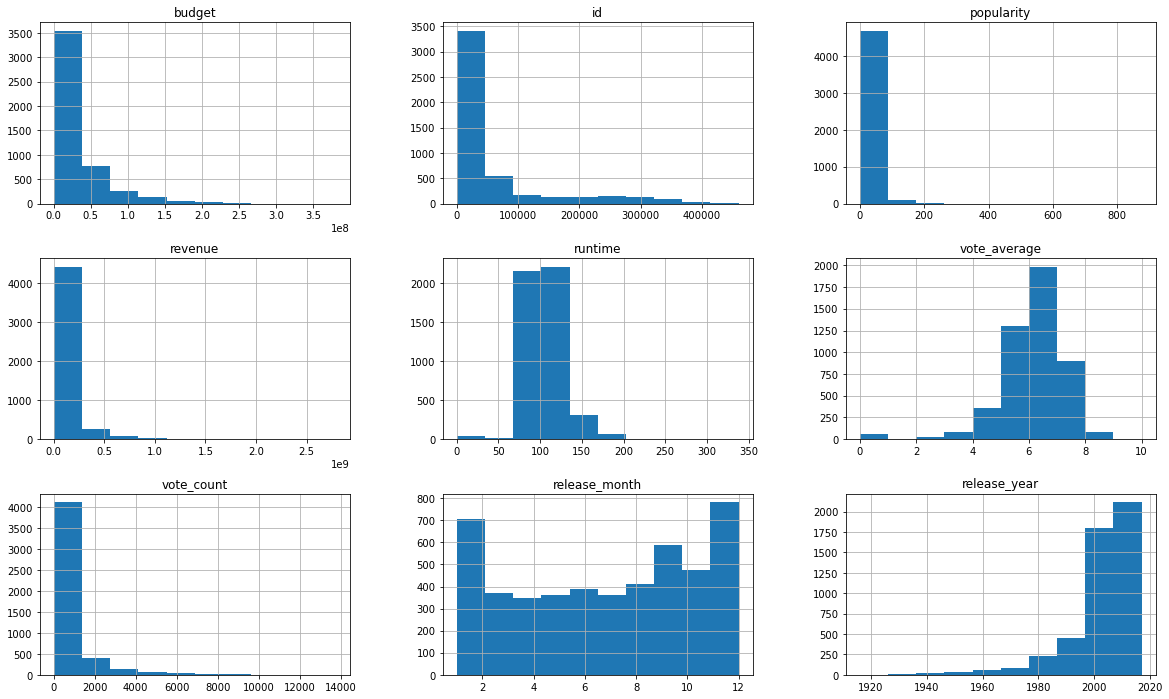

In [17]:
#Question 1#
R.hist(figsize=(20,12));

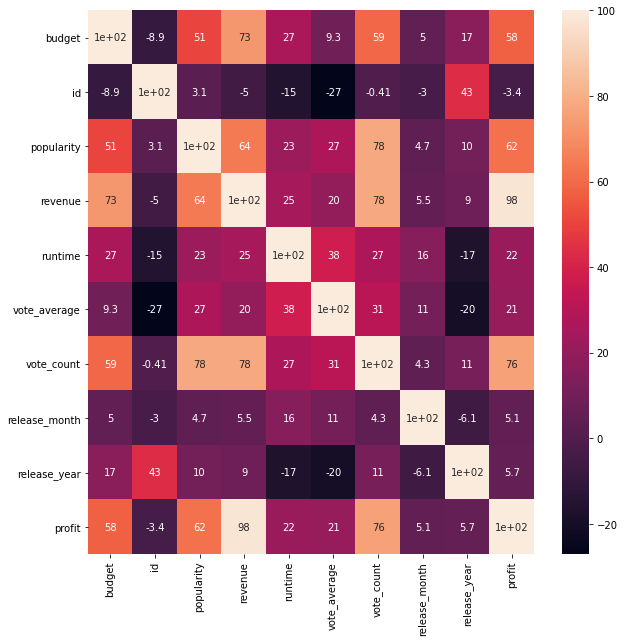

In [123]:
#Question 2#
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(R.corr()*100,annot=True);

1. Popularity is most linked to vote count, the more popular the movie, the more votes it will get, pos. or neg.
2. Budget is most linked to revenue, that is expected in light of the rational economic behavior of the producers.
3. The more vote count, the more revenue.
4. Vote average isn't related practically to any of other attributes, indicating that success dynamics attributes are not listed in this records.

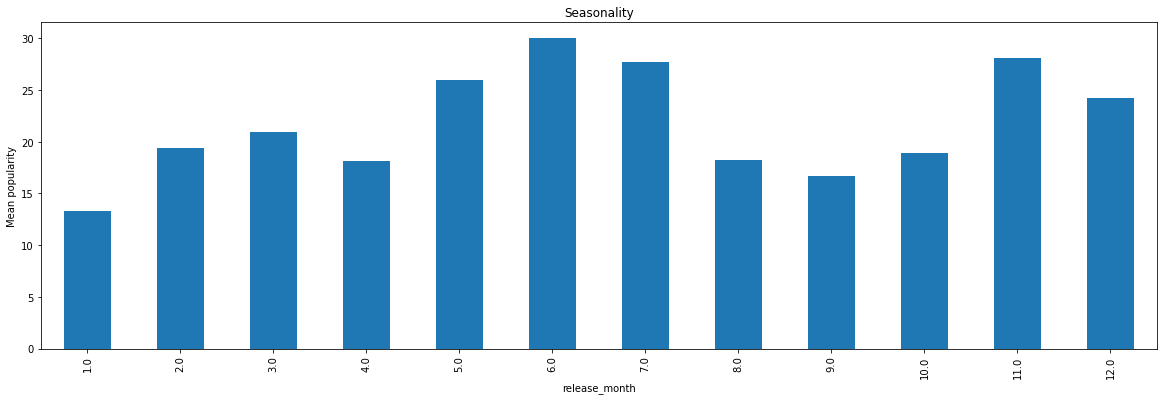

In [116]:
#Question 3#
R.groupby(['release_month'])['popularity'].mean().plot(kind='bar',ylabel='Mean popularity',title='Seasonality',figsize=(20,6));

Generally, the best months to release a movie are June, November and July, respectively.

In [113]:
#defining repeated function#
def language_month_variable(a):
    z = int(input("Enter count of top languages to be analyzed: "))
    for i in R['original_language'].value_counts().head(z).keys().values:    
        R.query('original_language=="{}"'.format(i)).groupby(['release_month'])[a].mean().plot(title='{} seasonality per language'.format(a),kind='line',ylabel=a,figsize=(20,6),label=i);
    return plt.legend()
    return plt.show()

Enter count of top languages to be analyzed: 2


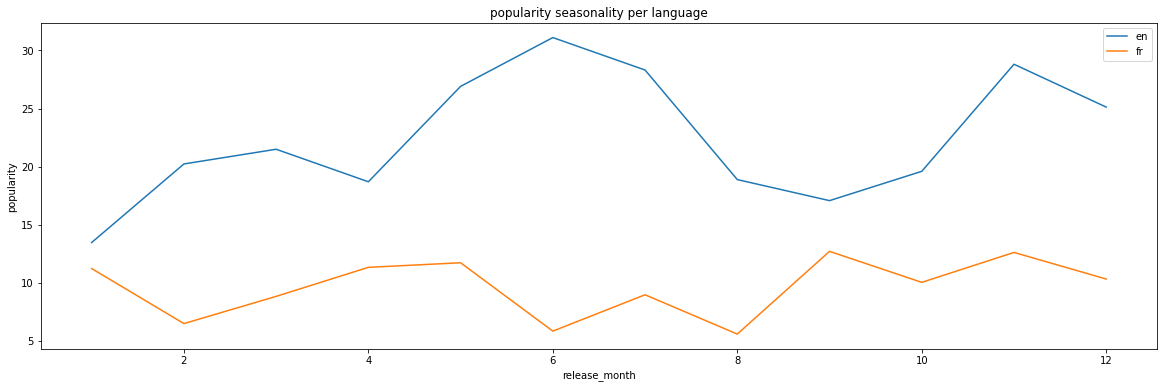

In [114]:
language_month_variable('popularity');

For the top 5 important languages (You can use different number), the popularity months differ widely, for example, in France, variety through months are minimum, in opposite to Spanish movies, that thrives in May.

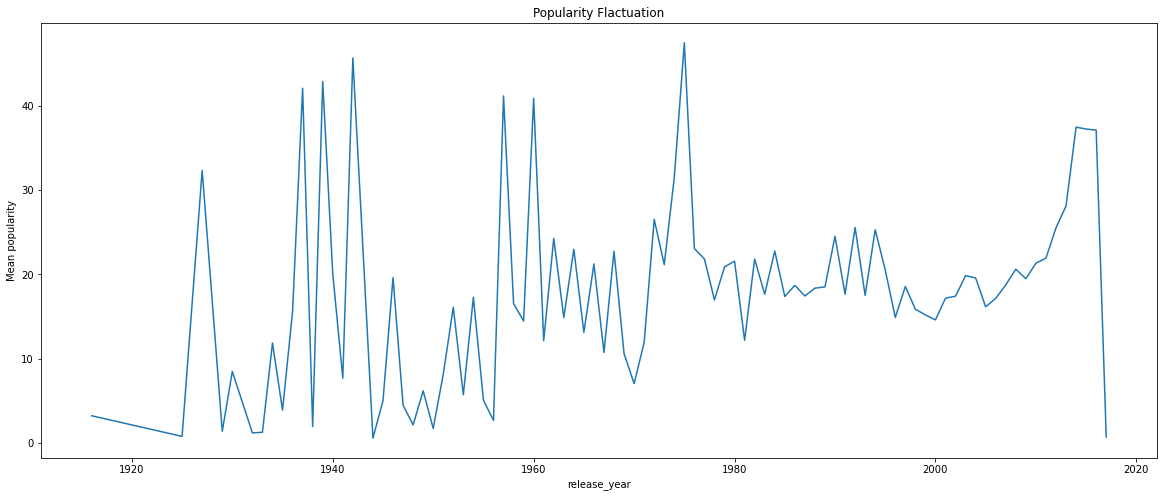

In [101]:
R.groupby(['release_year'])['popularity'].mean().plot(kind='line',title='Popularity Flactuation',ylabel='Mean popularity',figsize=(20,8));

The popularity trend through years doesn't seem to be meaningful, popularity droped in the great depression years, and thrived in the WW2 years, then drops and rethrives since last fifties.

In [25]:
#Question 4#
R['profit'] = R['revenue'] - R['budget']

Enter count of top languages to be analyzed: 2


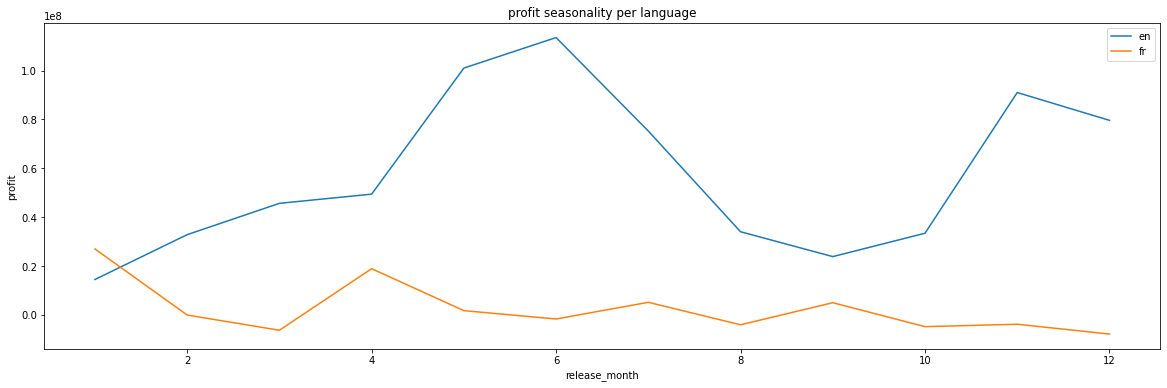

In [115]:
language_month_variable('profit');

Enter count of top languages to be analyzed: 5


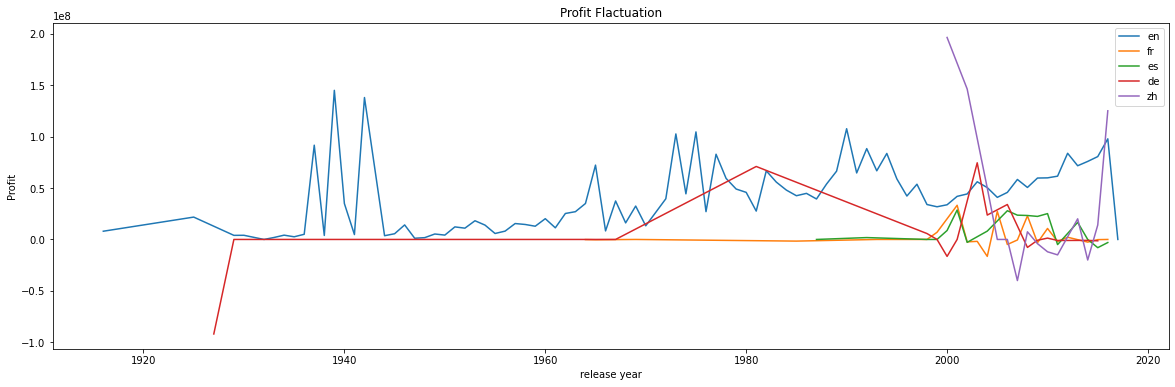

In [100]:
z = int(input("Enter count of top languages to be analyzed: "))
for i in R['original_language'].value_counts().head(z).keys().values:    
    R.query('original_language=="{}"'.format(i)).groupby(['release_year'])['profit'].mean().plot(kind='line',figsize=(20,6),label=i)
plt.legend()
plt.xlabel('release year')
plt.ylabel('Profit')
plt.title('Profit Flactuation')
plt.show()

1. The Chinese movies suffered horrible drop in profitability since 2000s, unlike Spanish movies that had ingreasing profits till 2006.
2. The English movies has a steady positive trend in profitability since 2000, unlike the german ones.

Enter count of top languages to be analyzed: 5


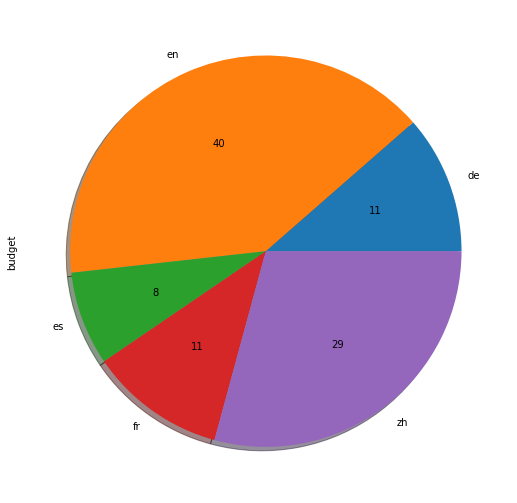

In [98]:
#Question 5#
z = int(input("Enter count of top languages to be analyzed: "))
s=[i for i in R['original_language'].value_counts().head(z).keys().values]  
R.query('original_language in {}'.format(s)).groupby(['original_language'])['budget'].mean().plot(autopct='%.0f',shadow=True,kind='pie',figsize=(9,9));

The english, then Chinese movies has the highest average budgets.

Enter count of top languages to be analyzed: 5


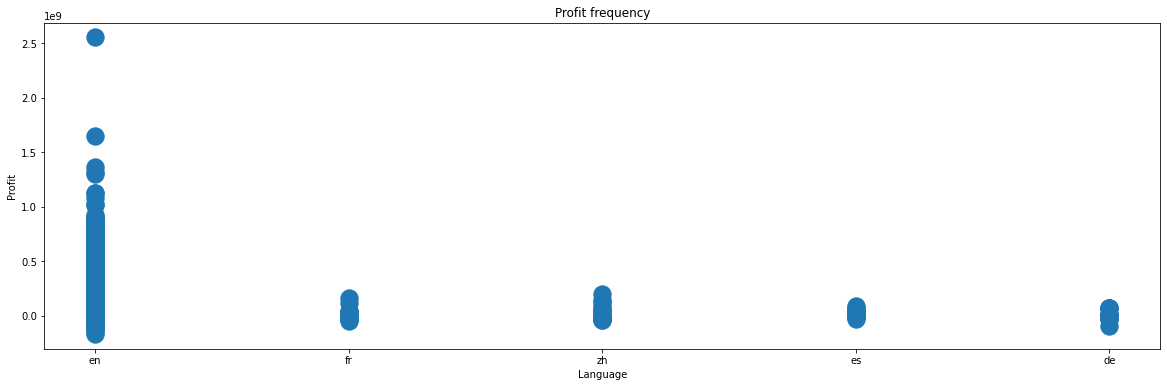

In [59]:
#Question 6#
z = int(input("Enter count of top languages to be analyzed: "))
s=[i for i in R['original_language'].value_counts().head(z).keys().values]   
fig, ax = plt.subplots(figsize=(20,6))
plt.title('Profit frequency')
plt.xlabel('Language')
plt.ylabel('Profit')
plt.scatter(x=R.query('original_language in {}'.format(s))['original_language'],y=R.query('original_language in {}'.format(s))['profit'],s=300);

The English movies has the greatest count of profitable movies.

In [53]:
#Question 7#
#filtering winners & losers#
winners = R.query('profit>0')
losers = R.query('profit<0') 

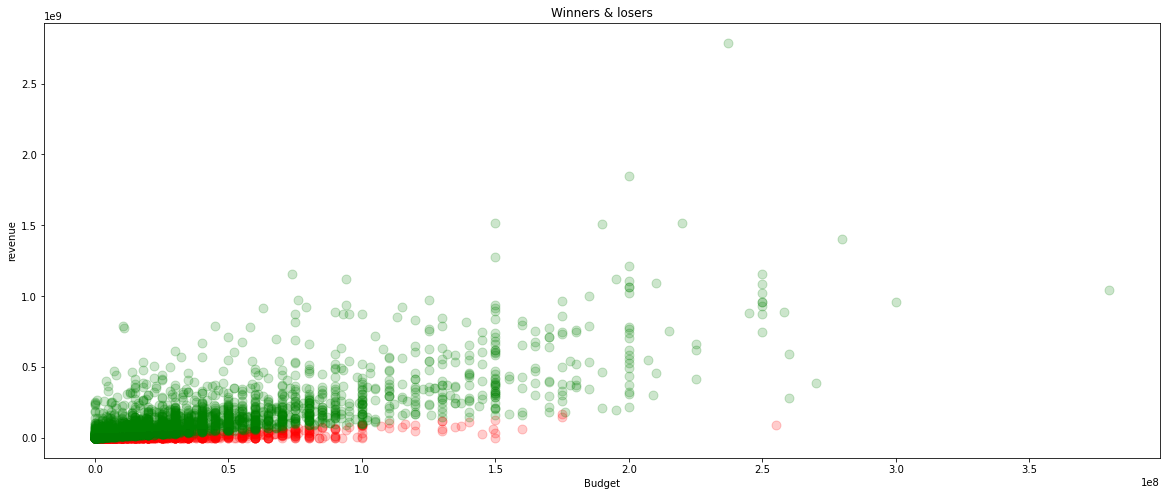

In [55]:
fig, ax = plt.subplots(figsize=(20,8))
plt.scatter(x=losers['budget'],y=losers['revenue'],c='r',alpha=0.2,s=80);
plt.scatter(x=winners['budget'],y=winners['revenue'],c='g',alpha=0.2,s=80);
plt.ylabel('revenue')
plt.xlabel('Budget')
plt.title('Winners & losers');

The movies under the equal x,y line are losers, they had revenue < budget, and red color, and vise versa.

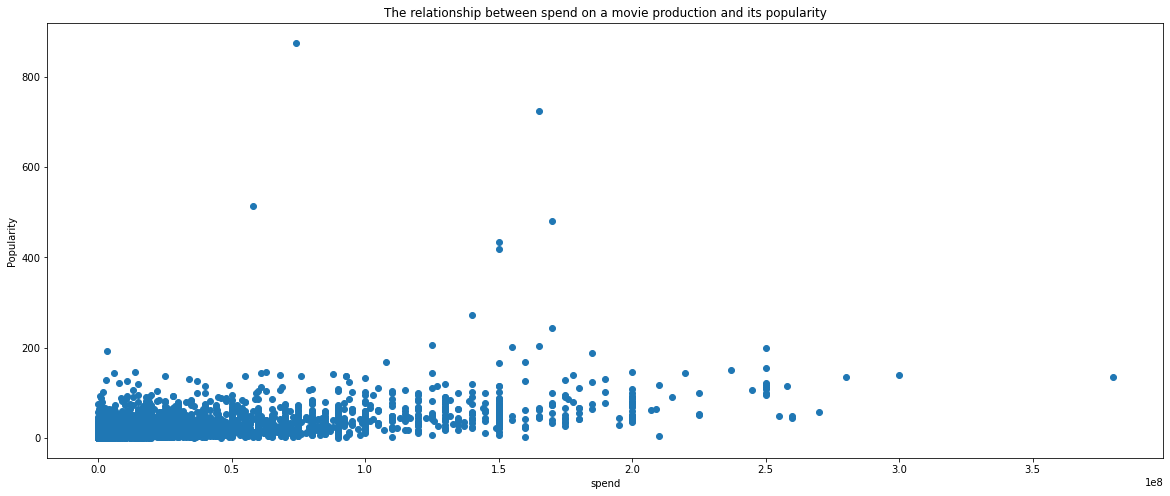

In [50]:
#Question 8#
fig, ax = plt.subplots(figsize=(20,8))
plt.title('The relationship between spend on a movie production and its popularity')
plt.xlabel('spend')
plt.scatter(x=R['budget'],y=R['popularity']);
plt.ylabel('Popularity');

The relationship between spend on a movie production and its popularity, partially correlated.

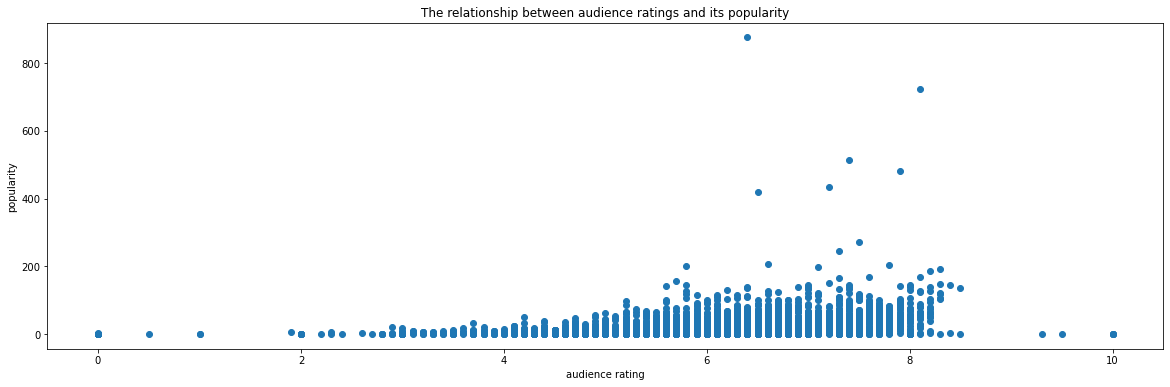

In [48]:
fig, ax = plt.subplots(figsize=(20,6))
plt.title('The relationship between audience ratings and its popularity')
plt.xlabel('audience rating')
plt.ylabel('popularity')
plt.scatter(x=R['vote_average'],y=R['popularity']);

The relationship between audience ratings and its popularity, partially correlated.

In [40]:
R['vote_average'].describe()

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

In [41]:
#creating audience rating bins#
aa = [0,5.6,6.2,6.8,10]
bb = ['Disappointing','Fair','Good','Excellent']

In [42]:
R['voted_rating'] = pd.cut(R['vote_average'],aa,labels=bb)

Enter count of top languages to be analyzed: 5


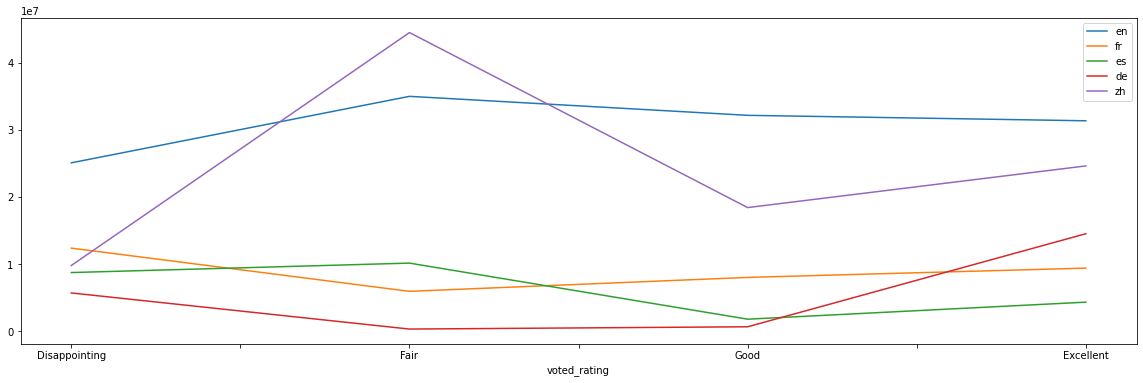

In [43]:
#Question 9#
z = int(input("Enter count of top languages to be analyzed: "))
fig, ax = plt.subplots(figsize=(20,6))
for i in R['original_language'].value_counts().head(z).keys().values:
    R.query('original_language in "{}"'.format(i)).groupby(['voted_rating'])['budget'].mean().plot(kind='line',label=i);
plt.legend()
plt.show()

Some times high spend doesn't mean good audience rating, for English movies, it's almost flat, and reversed for chinese movies in the two categories fair & good for example.

## Conclusion

> 1. All attributes are skwed, the only normally distributed one is: vote average.
> 2. Vote count is strongly correlated to popularity, profit & revenue (make sense), the same for budget & revenue.
> 3. The popularity trend through years doesn't seem to be meaningful, popularity droped in the great depression years, and thrived in the WW2 years, then drops and rethrives since last fifties.
> For the top 5 important languages (You can use different number), the popularity months differ widely, for example, in France, variety through months are minimum, in opposite to Spanish movies, that thrives in May.
> 4. The Chinese movies suffered horrible drop in profitability since 2000s, unlike Spanish movies that had ingreasing profits till 2006.
> The English movies has a steady positive trend in profitability since 2000, unlike the german ones.
> 5. The english, then Chinese movies has the highest average budgets.
> 6. The English movies has the greatest count of profitable movies.
> 7. The relationship between both spend on a movie production and audience ratings versus its popularity are partially correlated.
> 8. Some times high spend doesn't mean good audience rating, for English movies, it's almost flat, and reversed for chinese movies in the two categories fair & good for example.
